In [1]:
import numpy as np
import matplotlib.pyplot as plt

# interpolate x to 2x

In [2]:
def interpolate_2x(x, a):
    
    return((1-a)*x + (a)*2*x)

def interpolate_05x(x, a):
    
    return((1-a)*x + (a)*0.5*x)

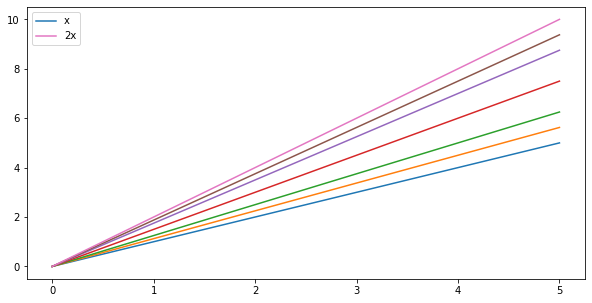

In [3]:
# plot the interpolation for different values of a

x_ = np.linspace(0, 5, 1000+1)

y0 = interpolate_2x(x_, a=0)
y18 = interpolate_2x(x_, a=1/8)
y14 = interpolate_2x(x_, a=1/4)
y12 = interpolate_2x(x_, a=1/2)
y34 = interpolate_2x(x_, a=3/4)
y78 = interpolate_2x(x_, a=7/8)
y1 = interpolate_2x(x_, a=1)

plt.figure(figsize=(10, 5))
plt.plot(x_, y0, label='x')
plt.plot(x_, y18)
plt.plot(x_, y14)
plt.plot(x_, y12)
plt.plot(x_, y34)
plt.plot(x_, y78)
plt.plot(x_, y1, label='2x')
plt.legend()
plt.show();

In [4]:
# interpolate a Gaussian

def interpolate_Gaussian(x, mu, sigma, a):
    c = (1-a) + 0.5*a
    return(1/(sigma* np.sqrt(2*np.pi)) * np.exp(-0.5 * (interpolate_05x(x, a)-mu)**2/sigma**2) * c)

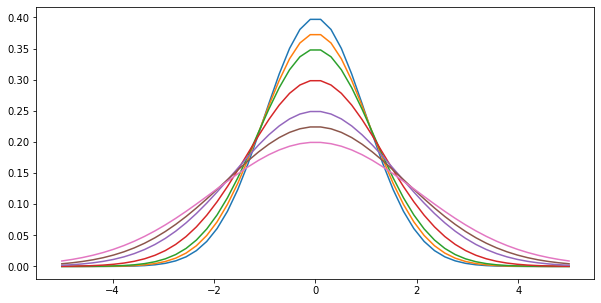

In [5]:
#plot the interpolation
m1, s1 = 0, 1
x_G = np.linspace(-5, 5)

yG0 = interpolate_Gaussian(x_G, m1, s1, a=0)
yG18 = interpolate_Gaussian(x_G, m1, s1, a=1/8)
yG14 = interpolate_Gaussian(x_G, m1, s1, a=1/4)
yG12 = interpolate_Gaussian(x_G, m1, s1, a=1/2)
yG34 = interpolate_Gaussian(x_G, m1, s1, a=3/4)
yG78 = interpolate_Gaussian(x_G, m1, s1, a=7/8)
yG1 = interpolate_Gaussian(x_G, m1, s1, a=1)

plt.figure(figsize=(10, 5))
plt.plot(x_G, yG0)
plt.plot(x_G, yG18)
plt.plot(x_G, yG14)
plt.plot(x_G, yG12)
plt.plot(x_G, yG34)
plt.plot(x_G, yG78)
plt.plot(x_G, yG1)
plt.show();

# Interpolate with both pictures in one figure

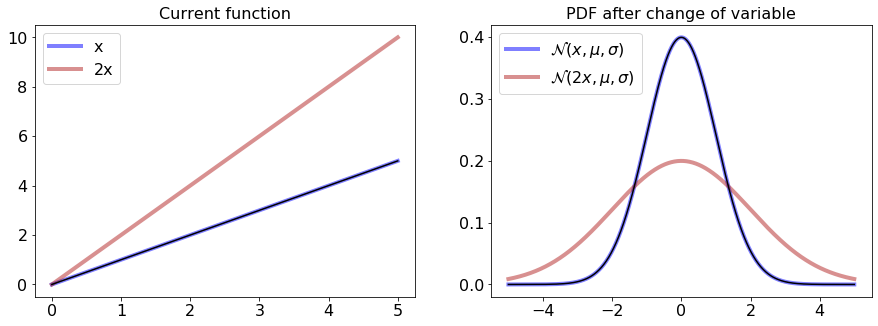

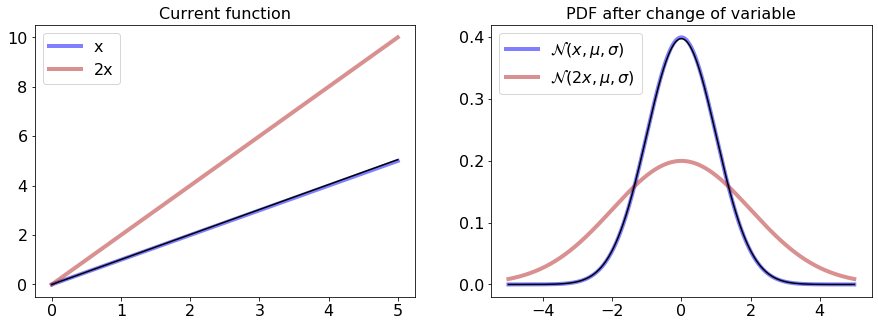

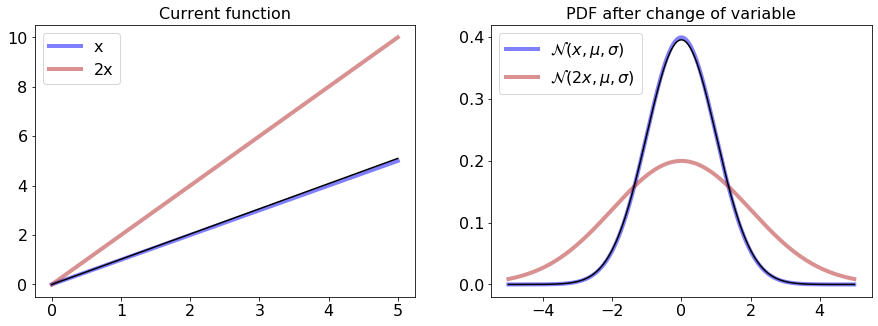

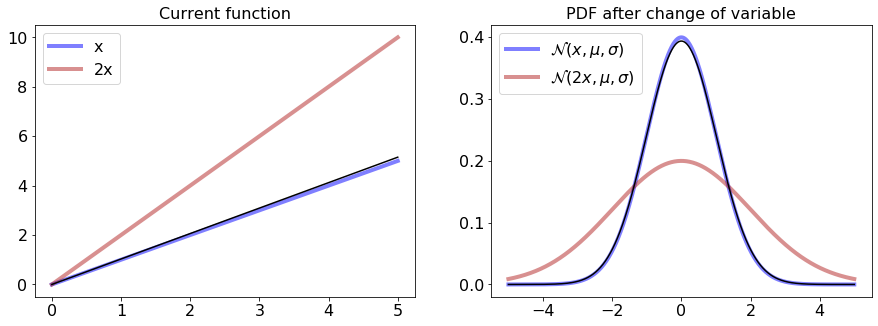

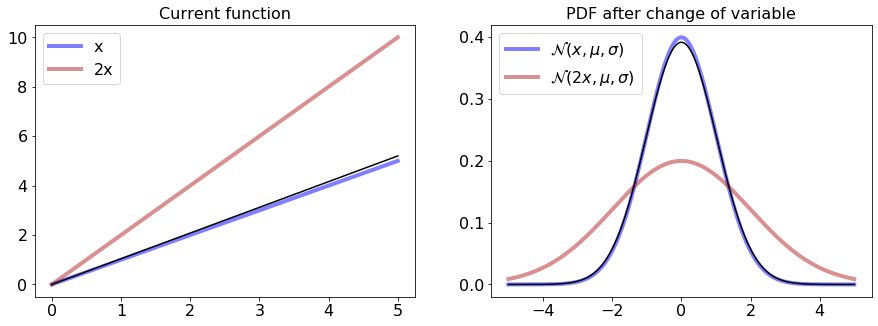

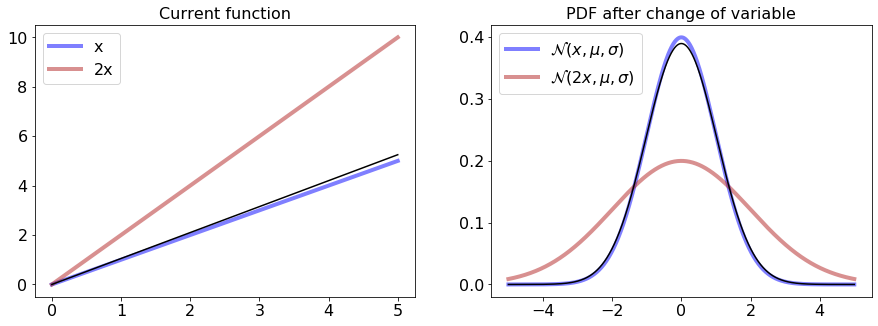

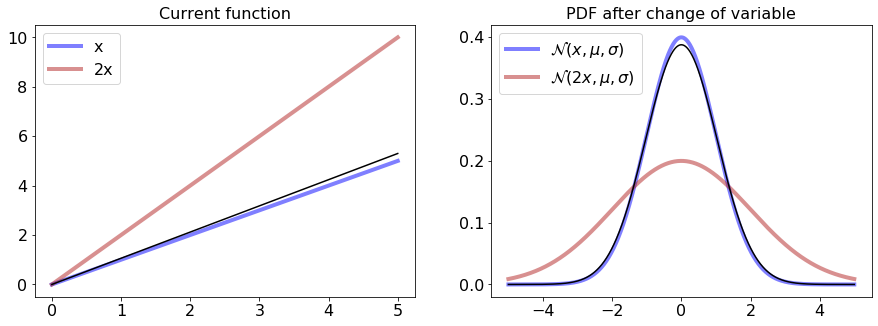

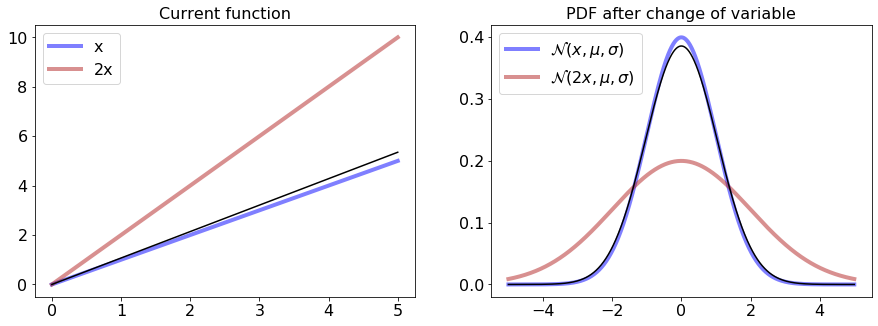

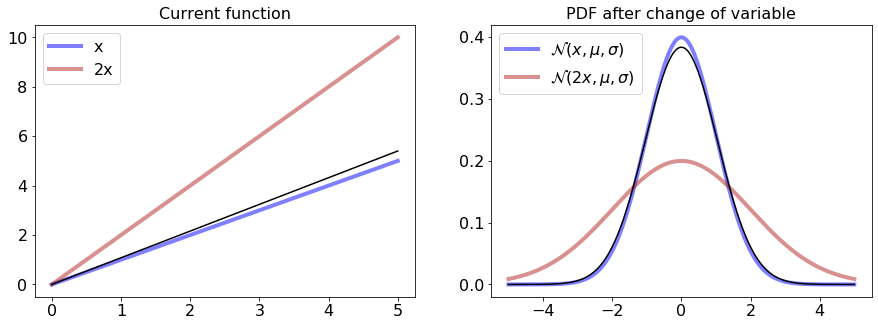

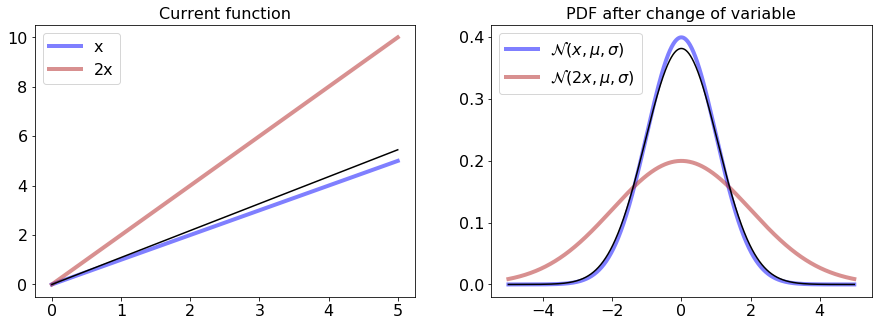

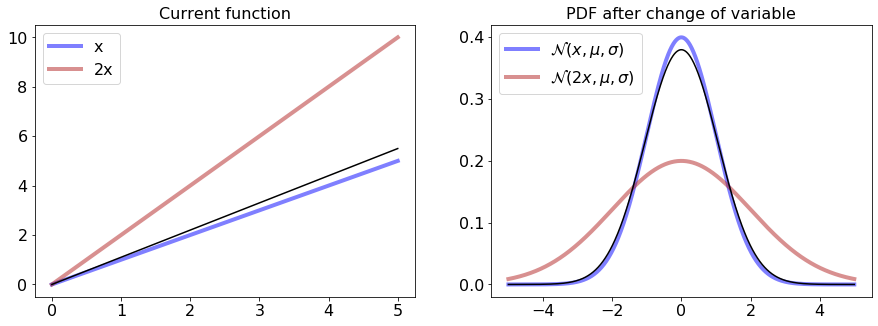

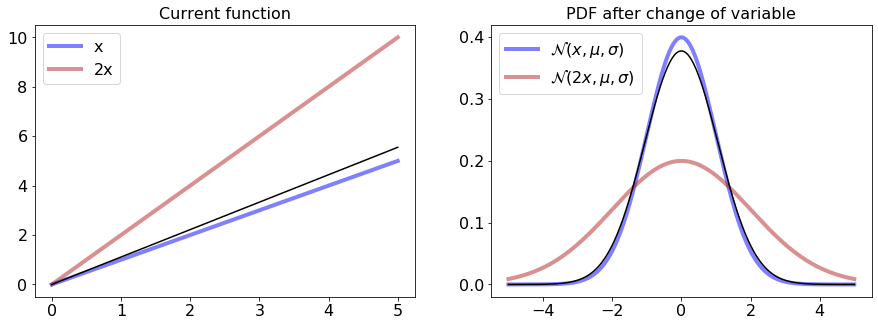

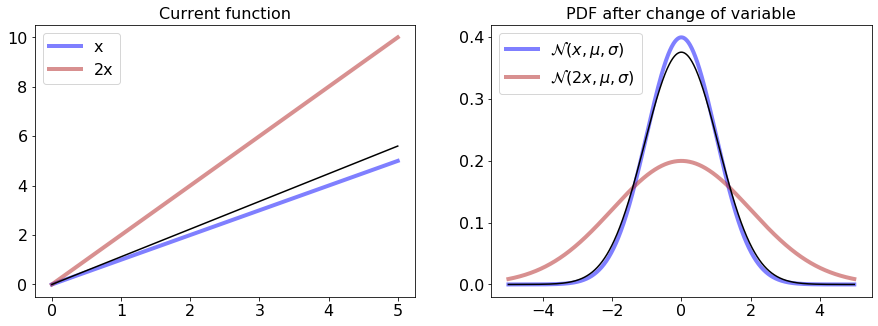

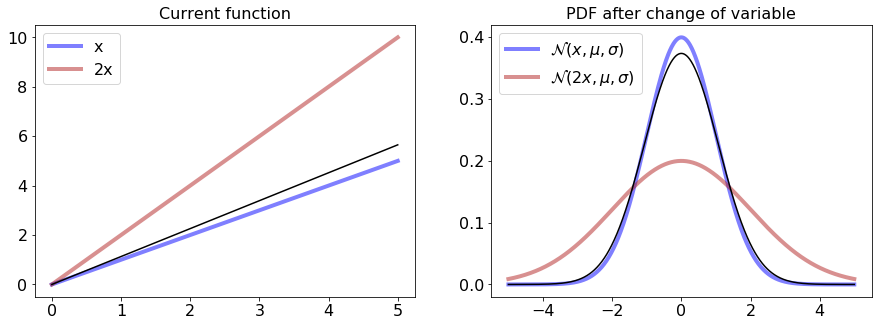

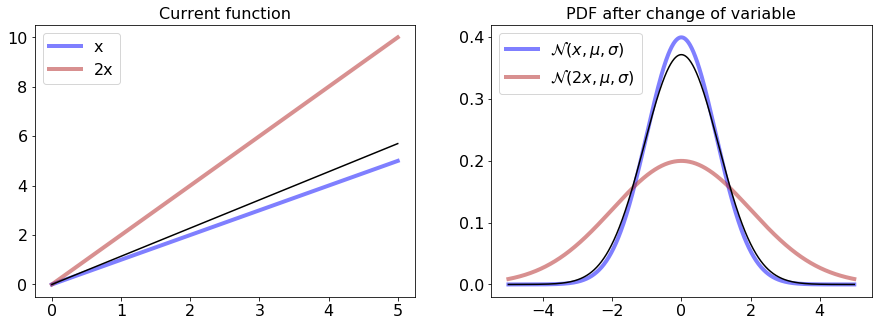

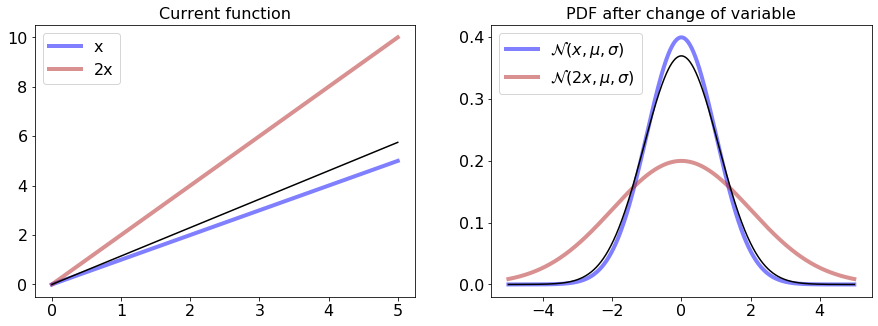

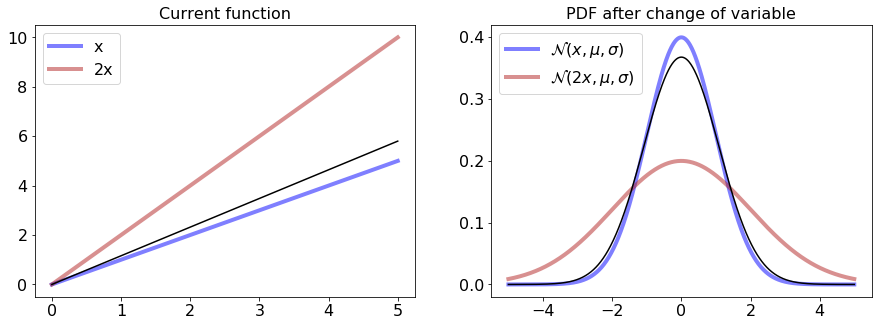

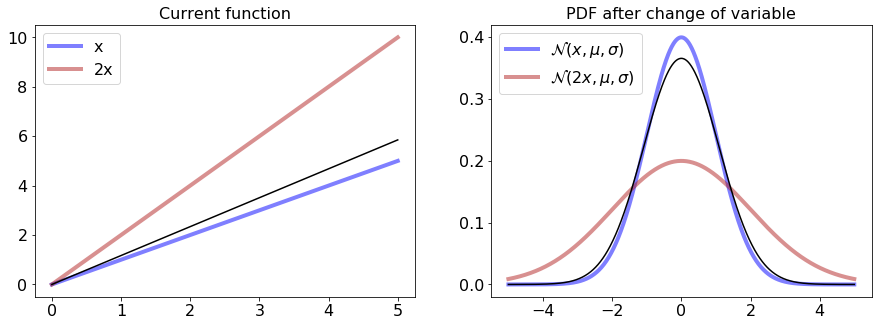

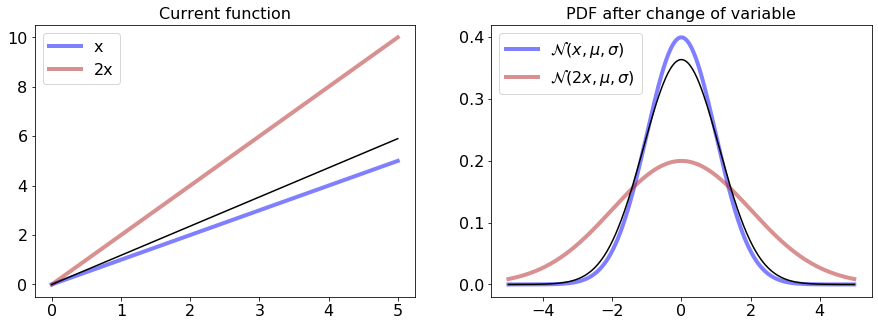

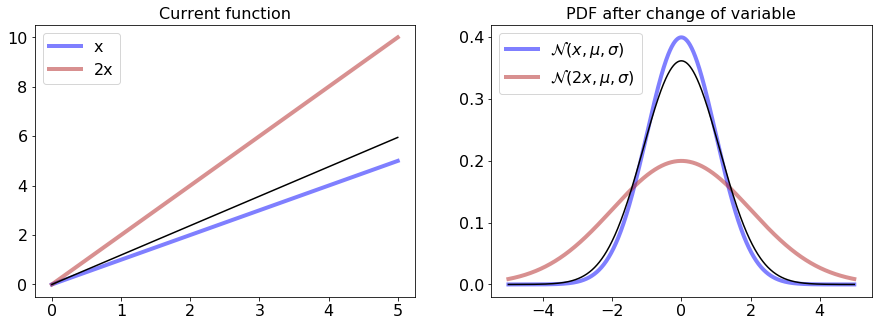

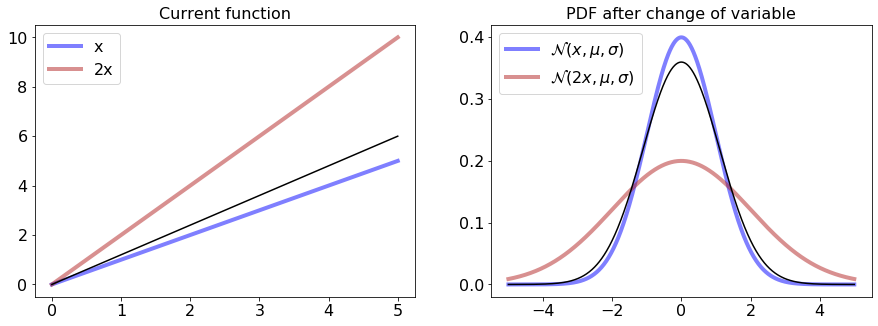

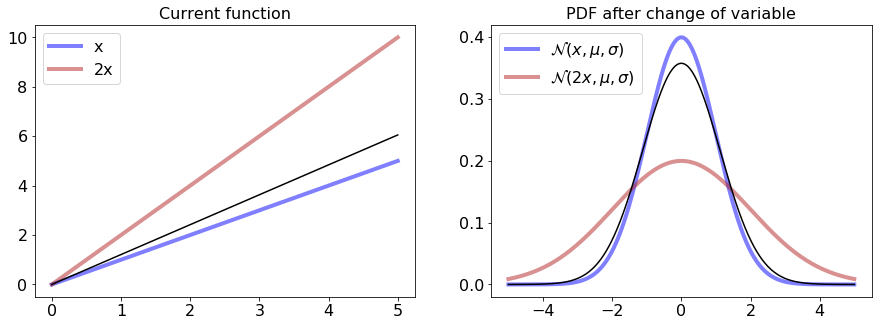

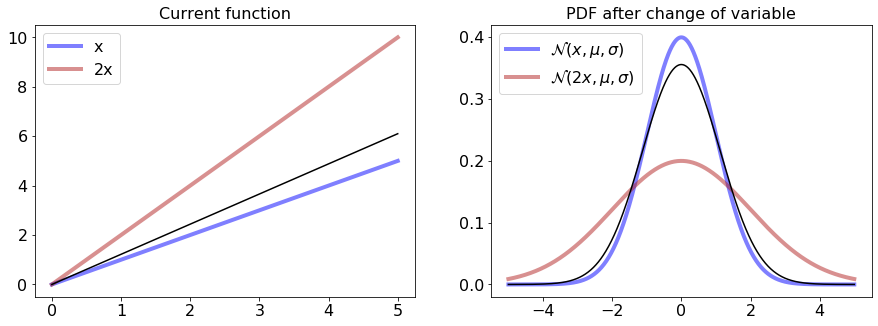

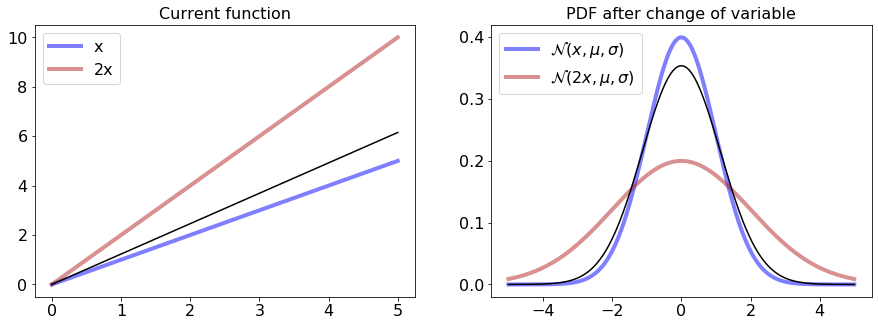

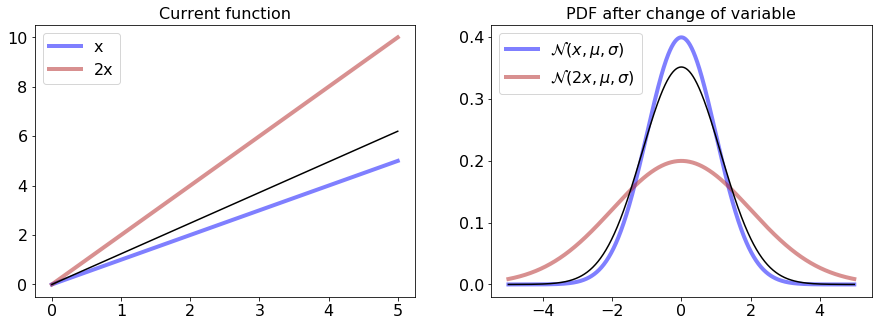

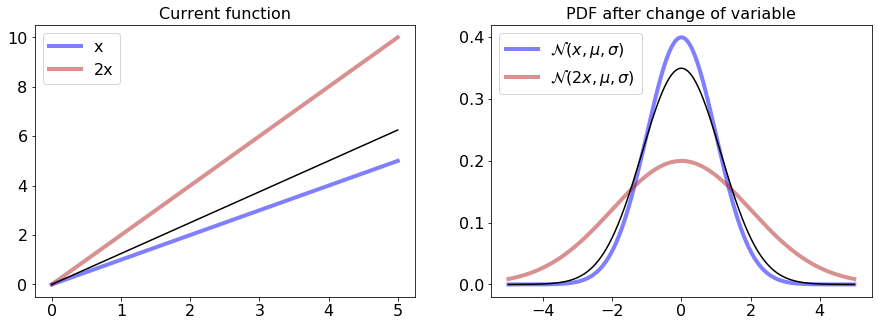

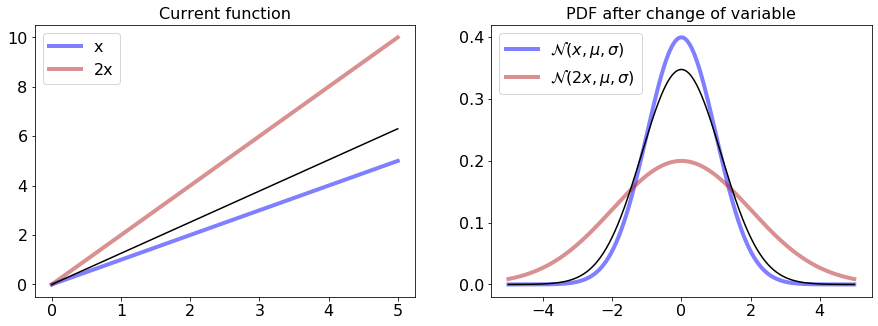

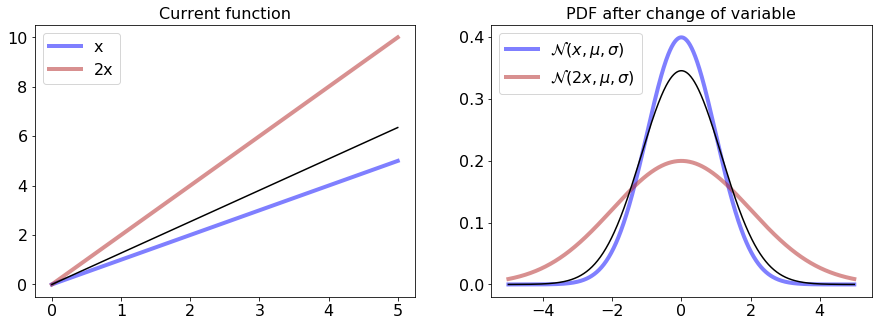

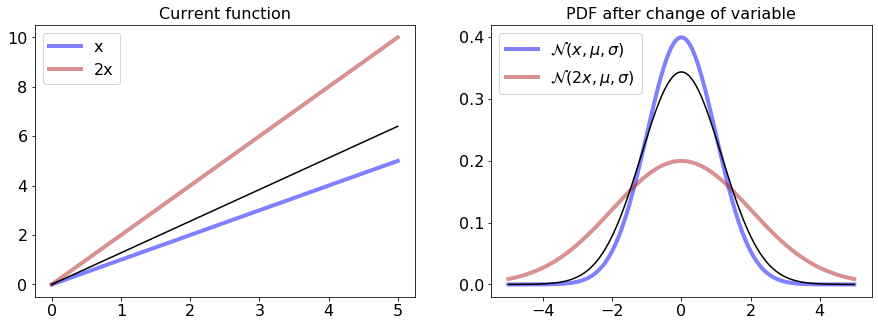

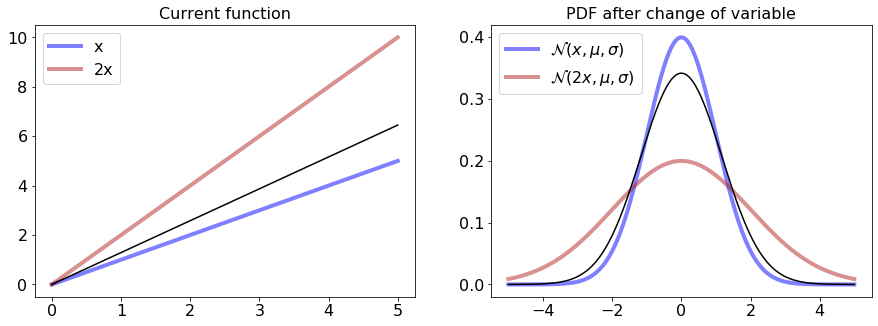

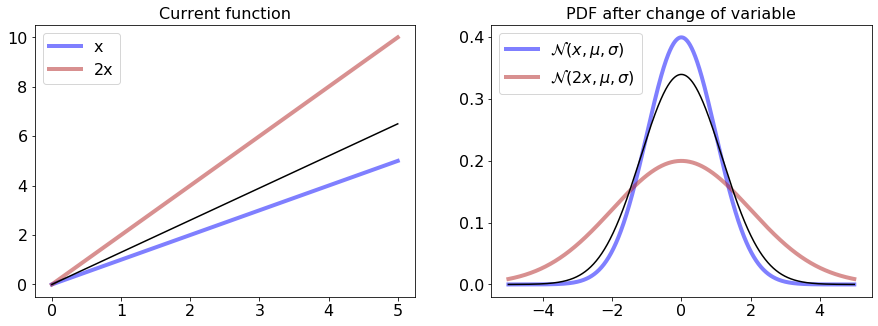

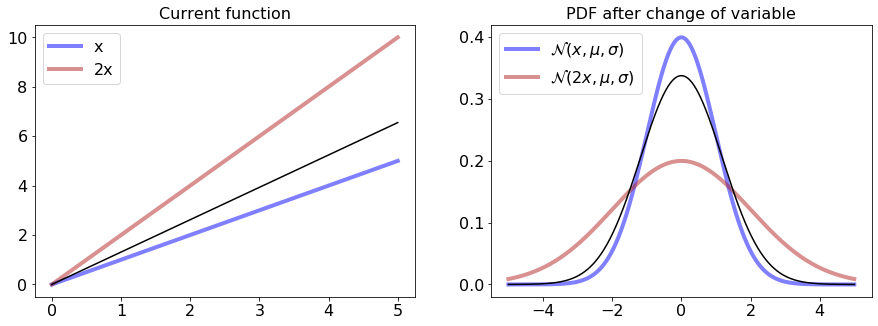

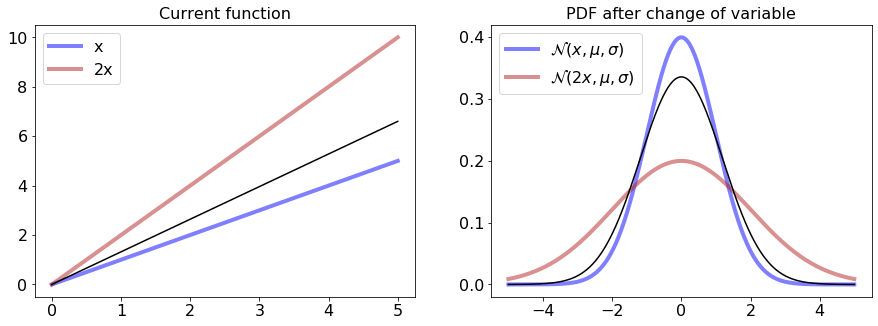

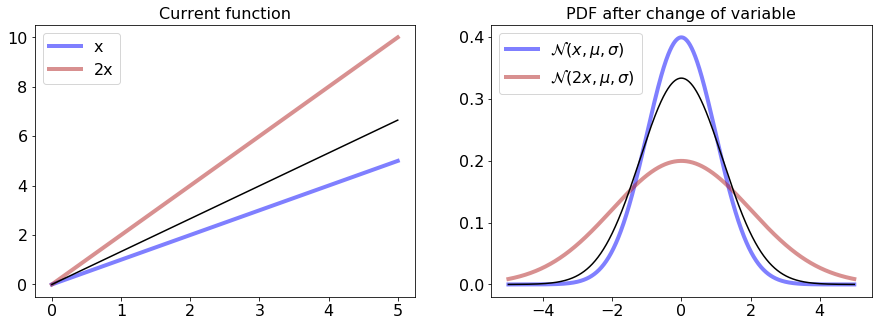

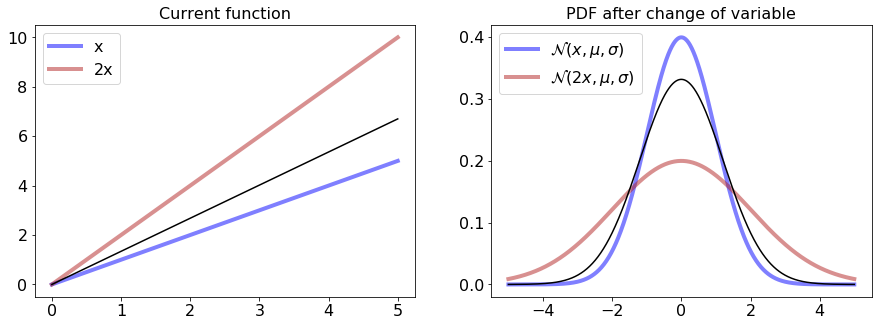

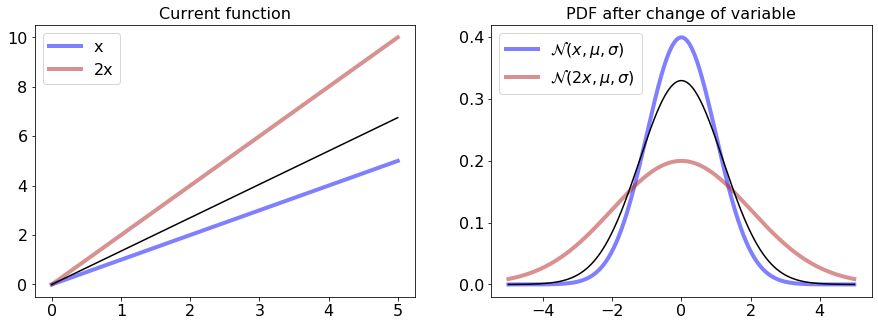

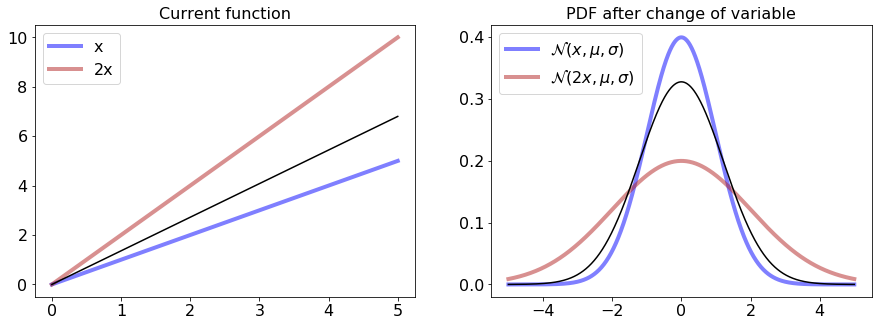

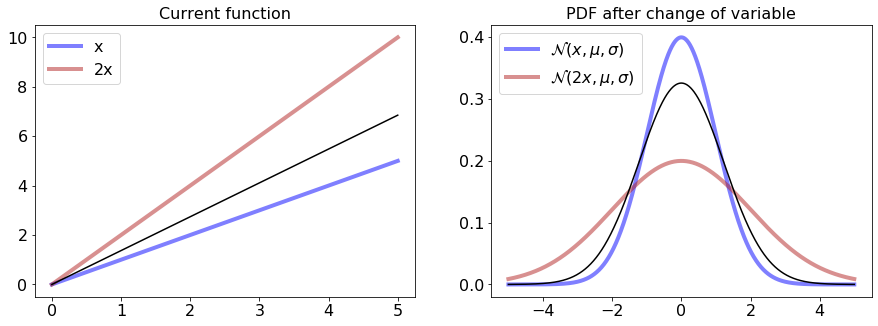

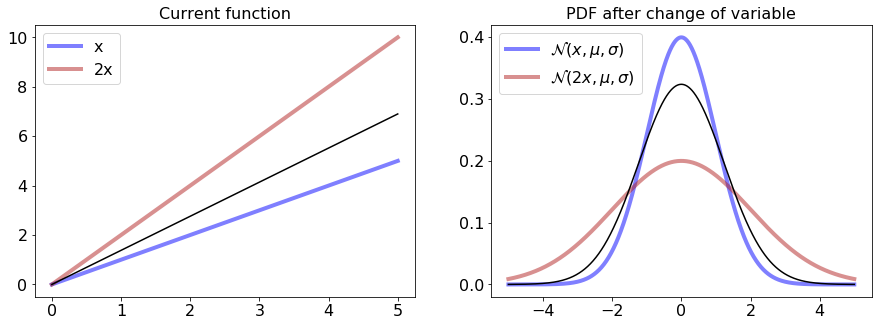

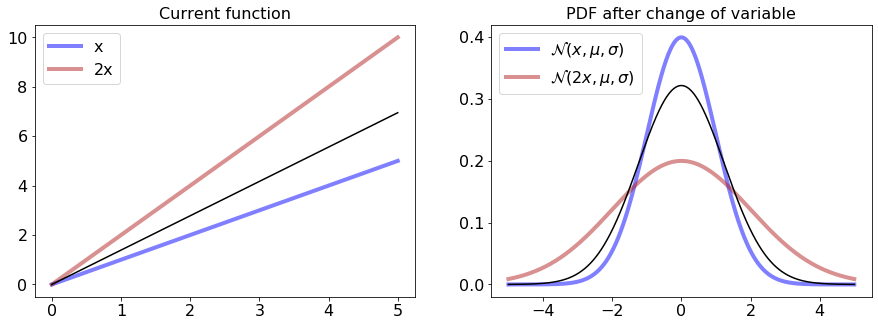

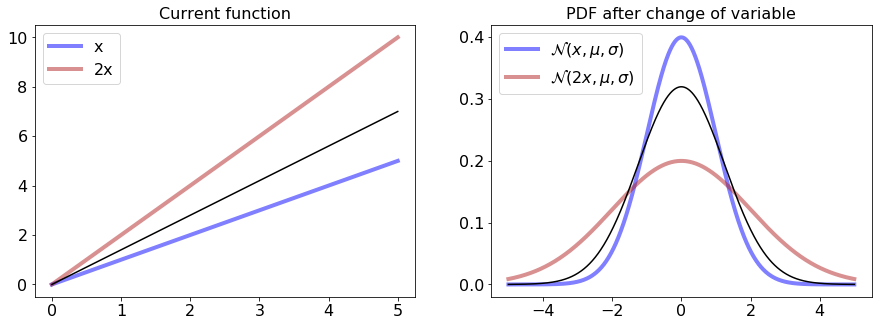

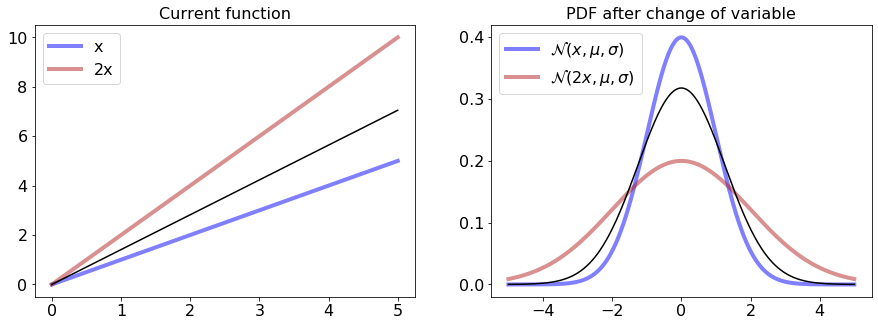

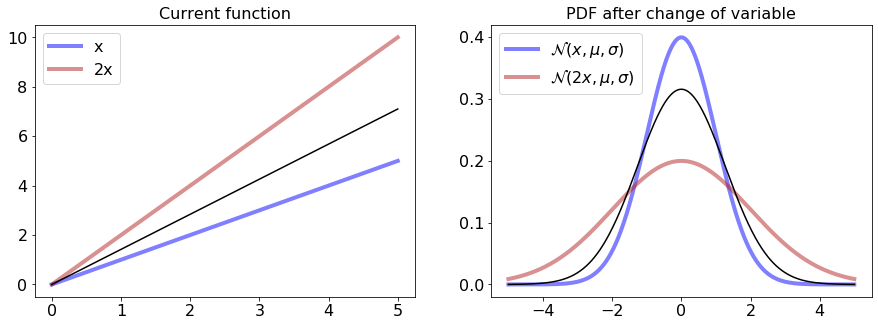

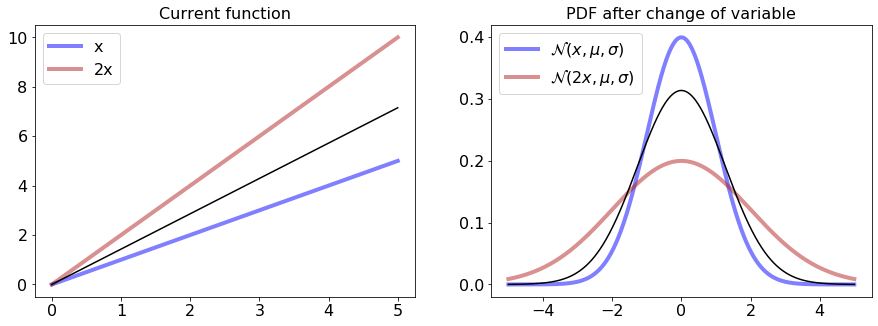

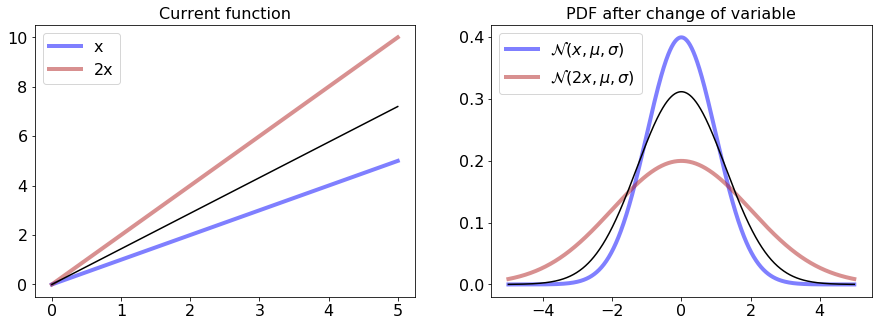

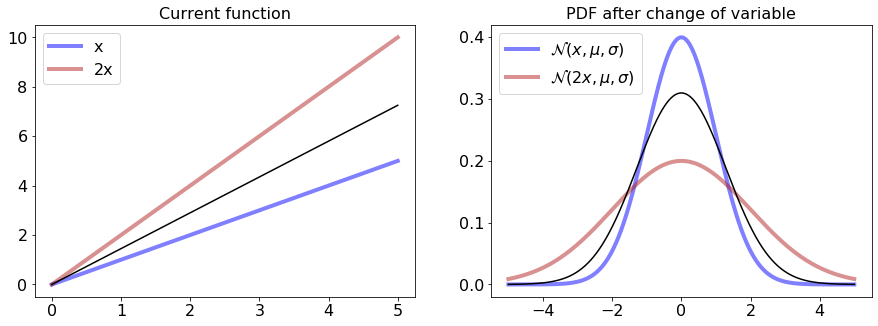

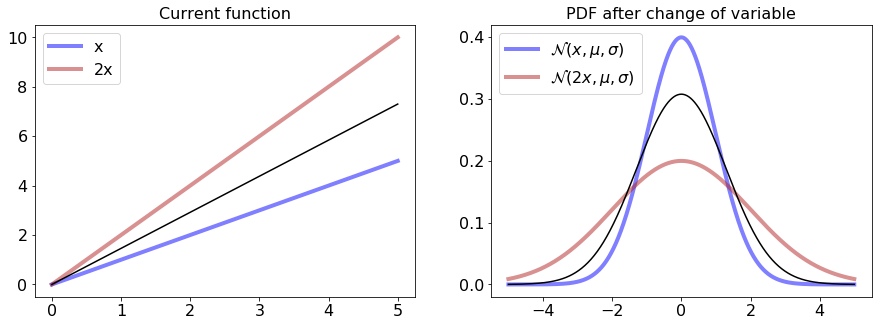

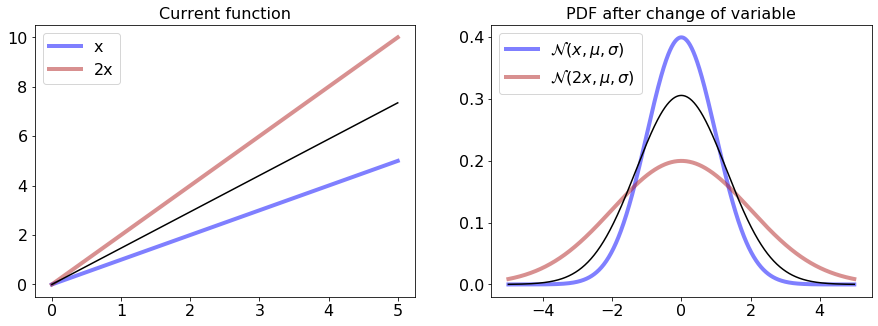

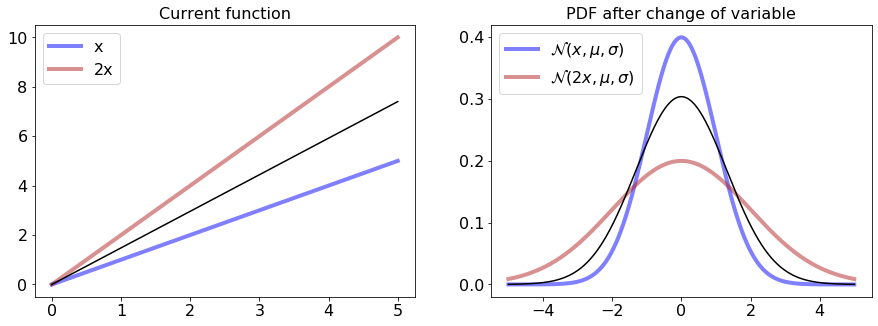

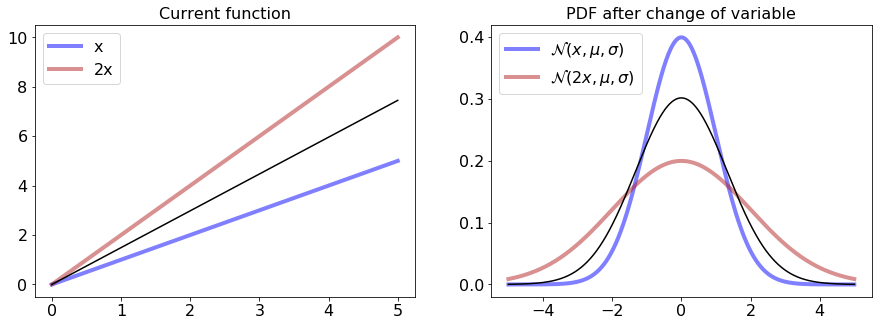

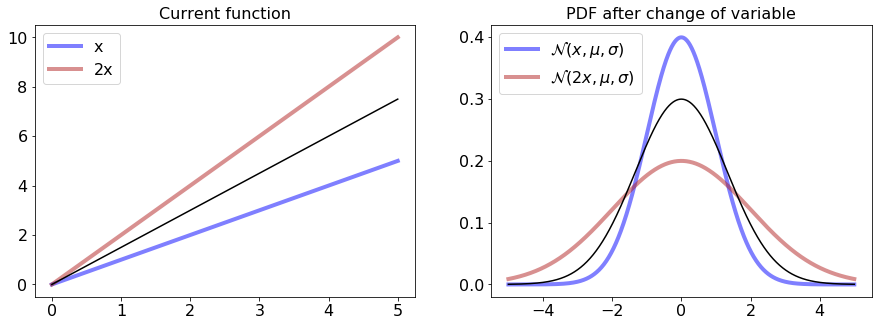

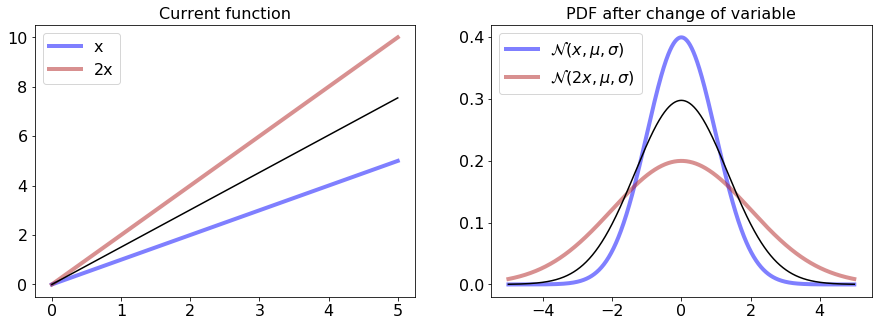

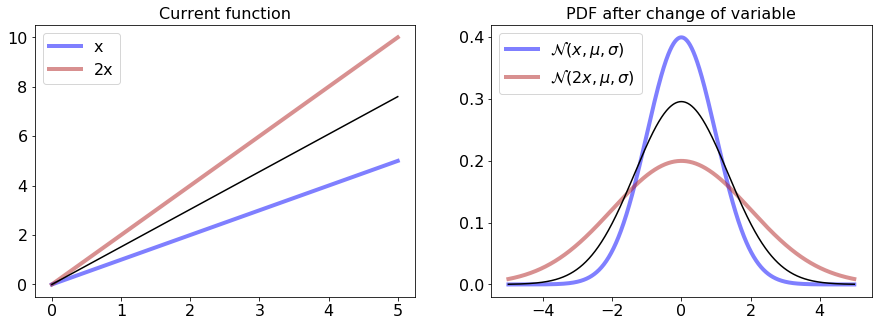

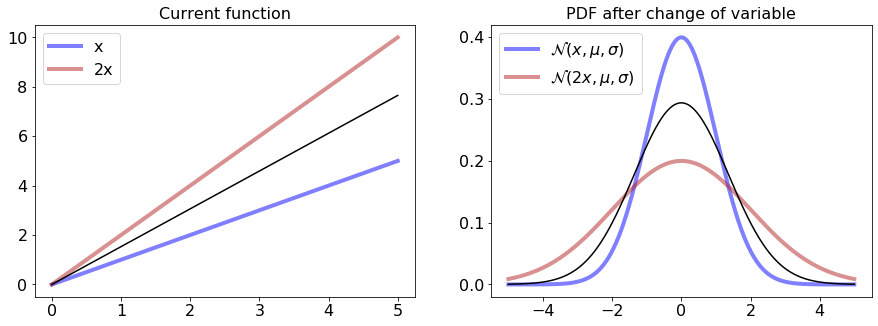

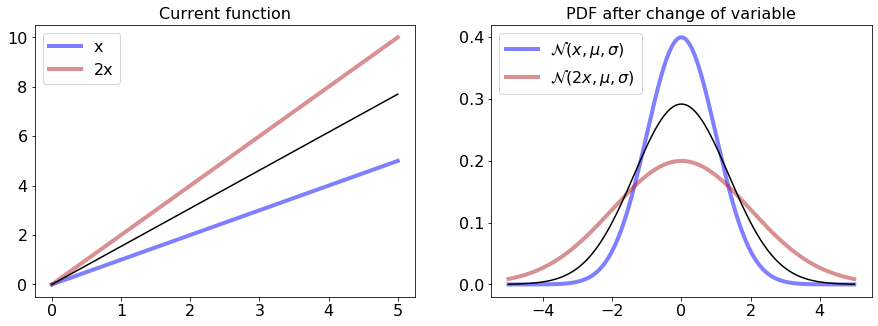

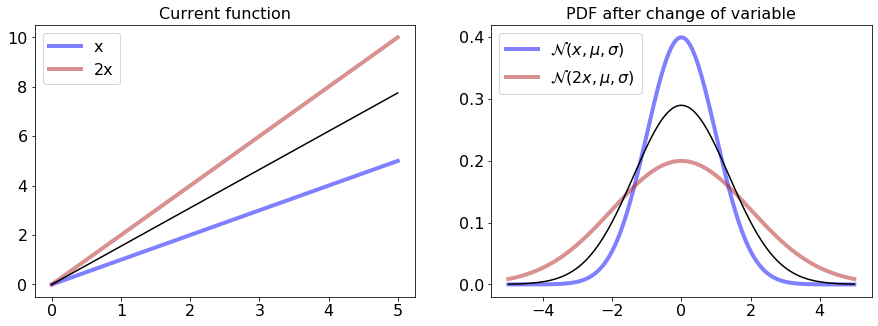

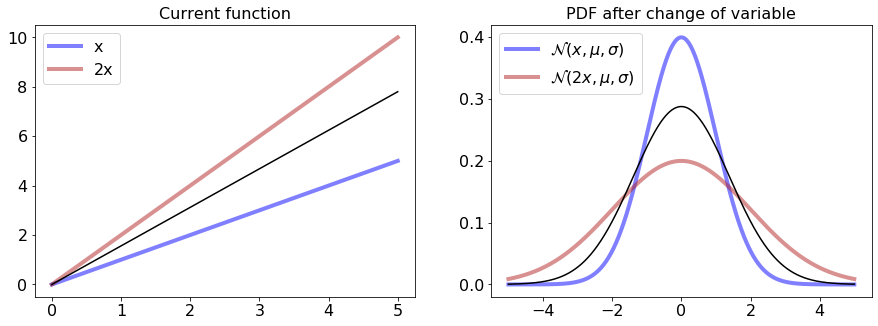

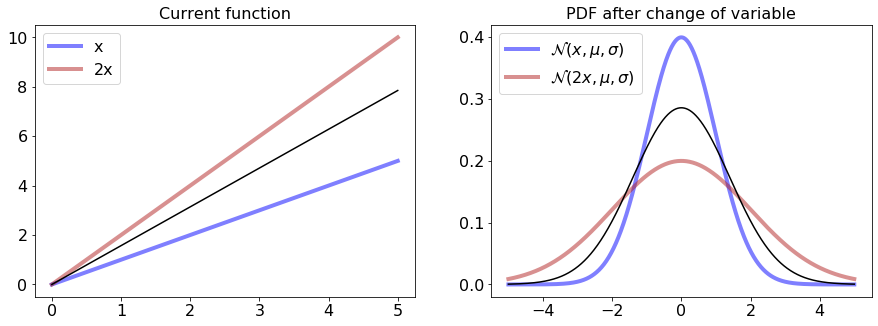

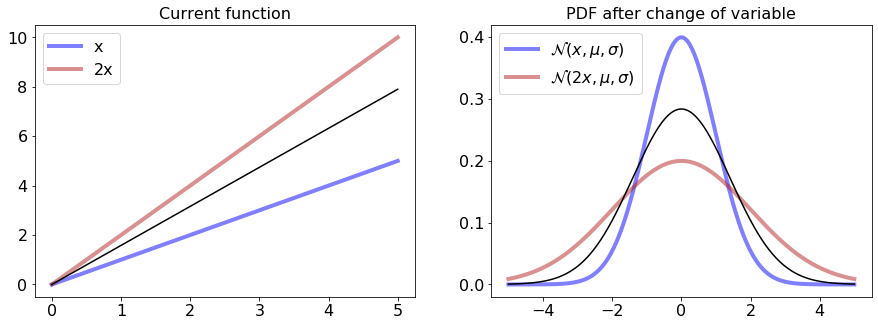

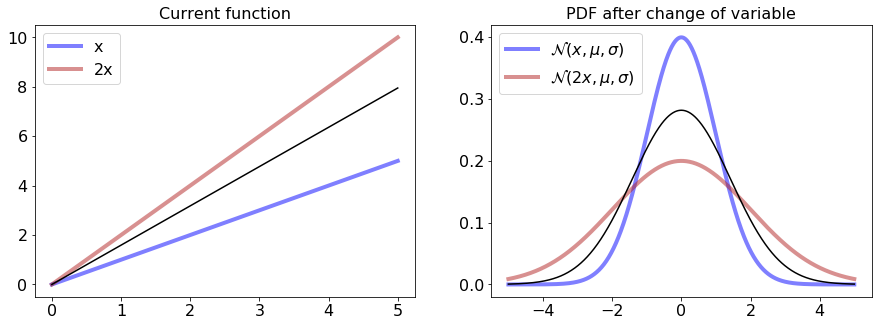

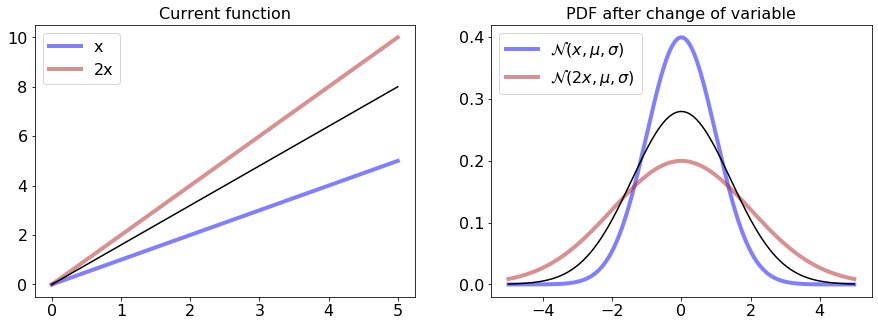

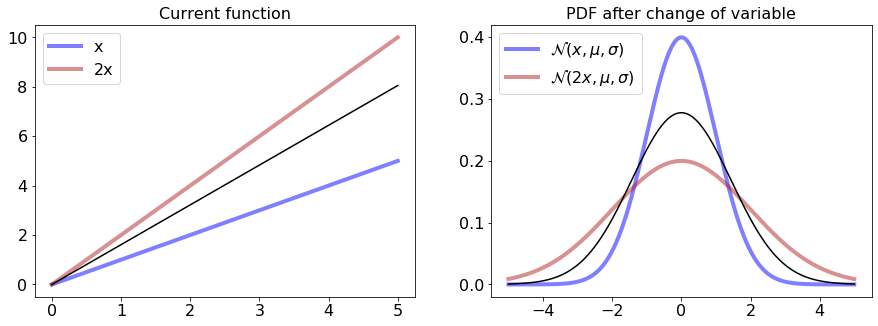

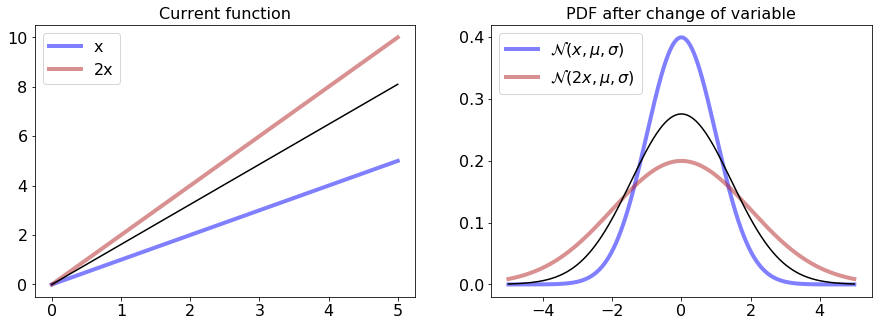

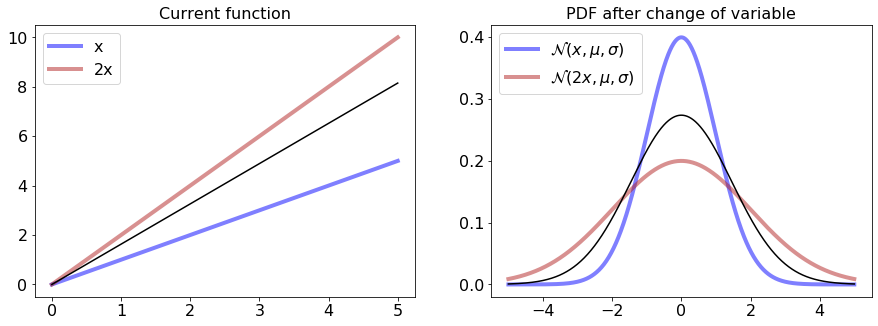

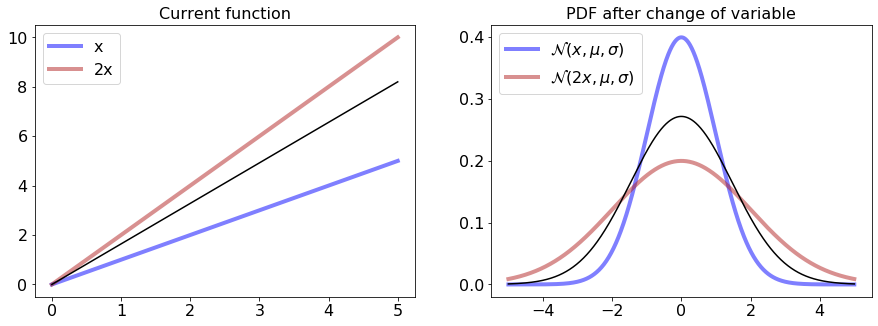

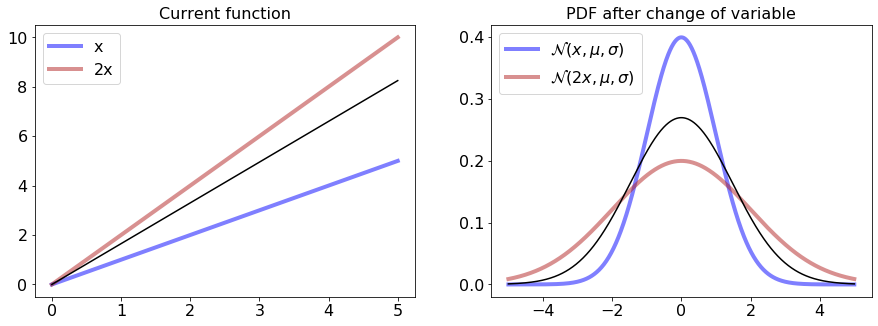

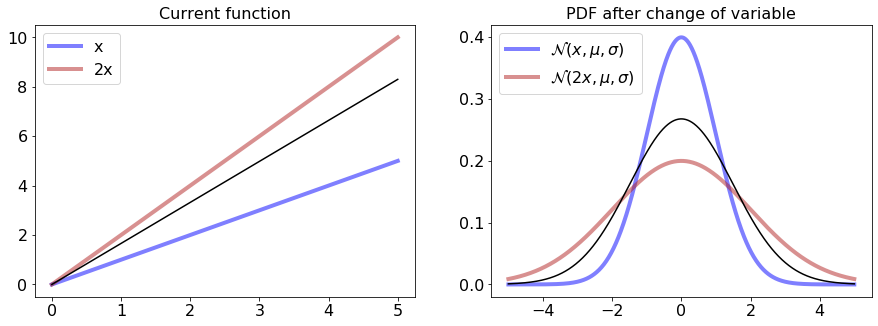

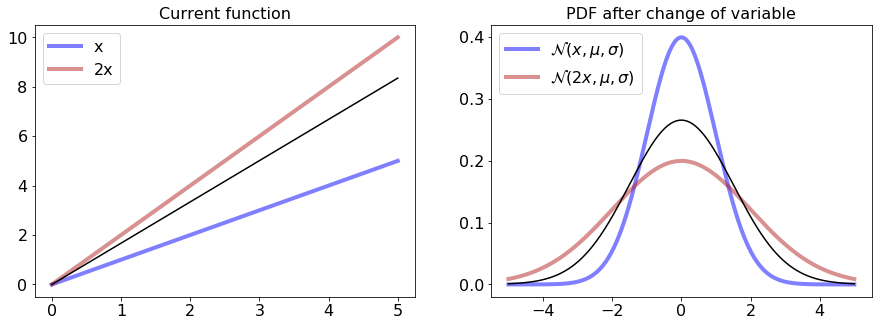

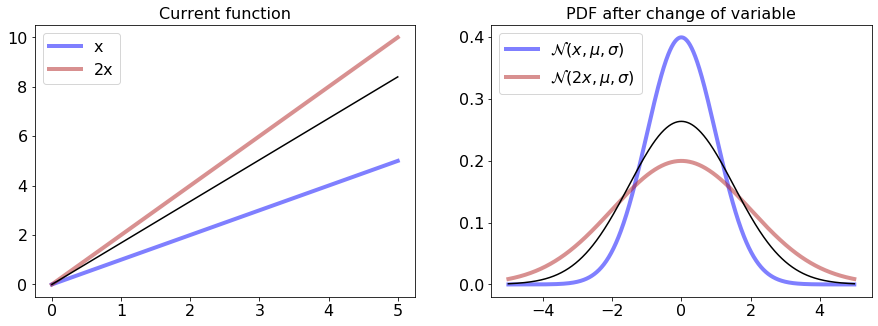

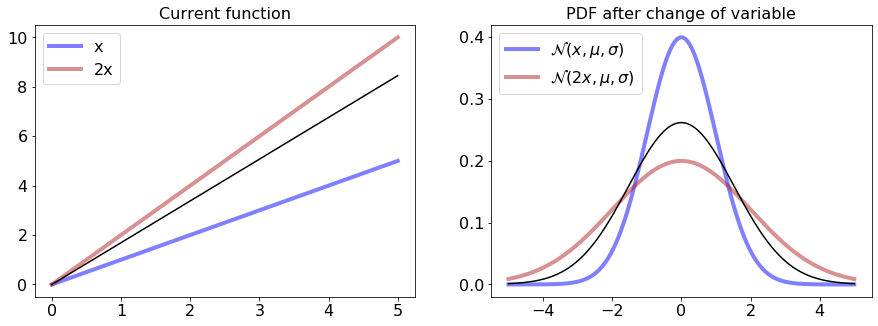

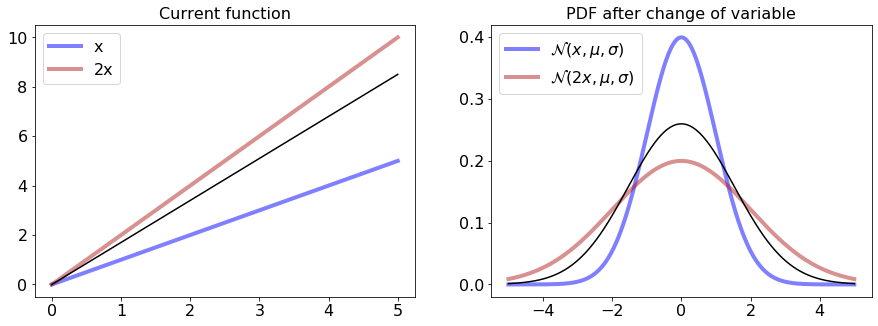

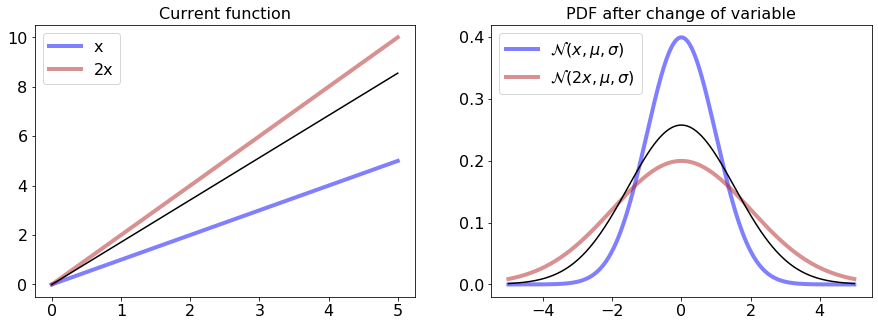

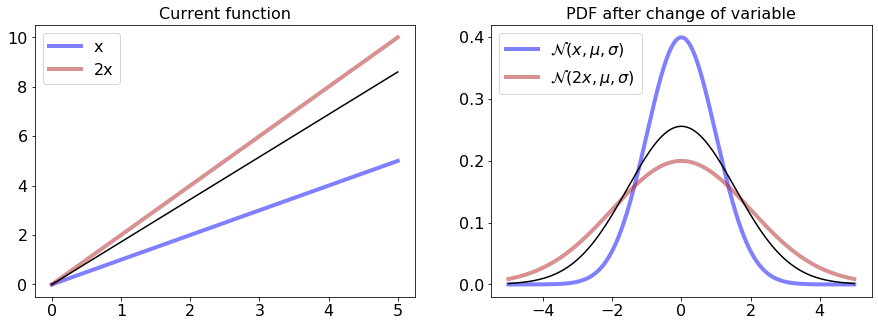

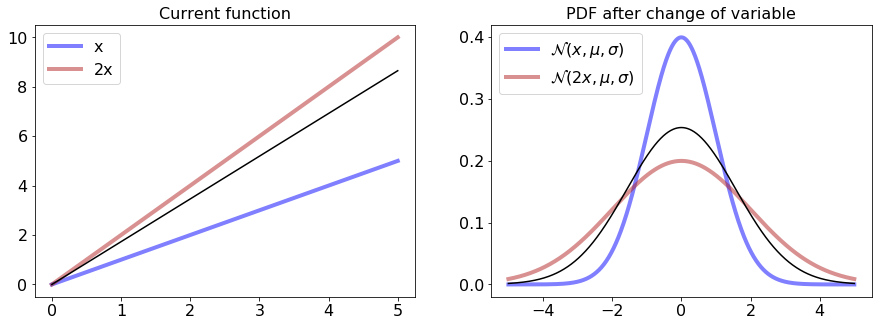

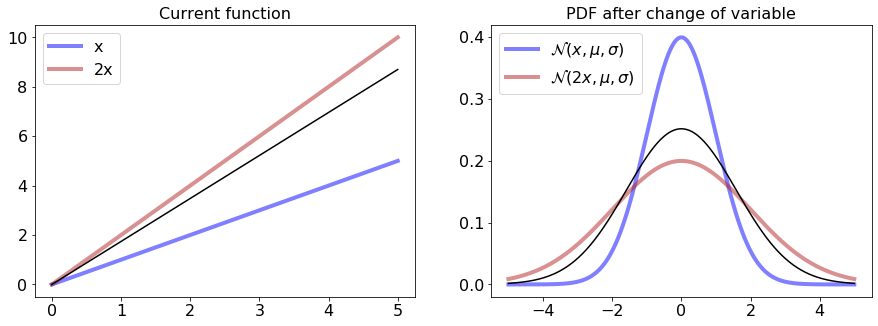

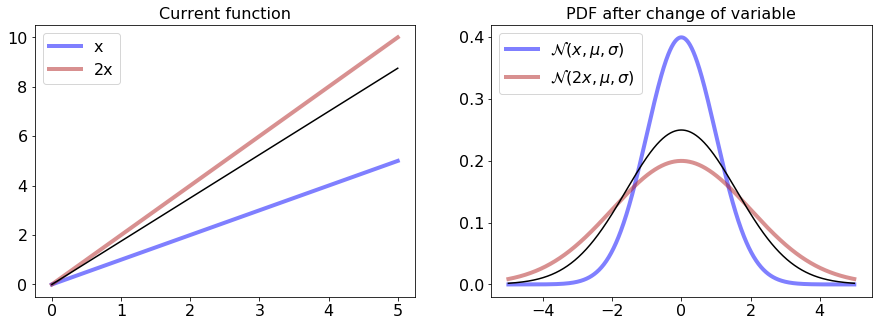

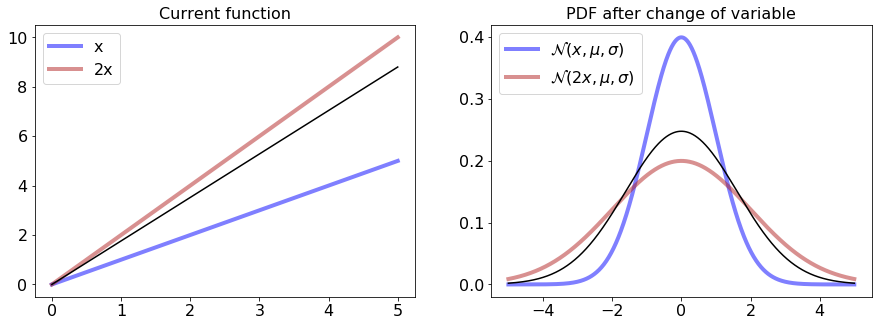

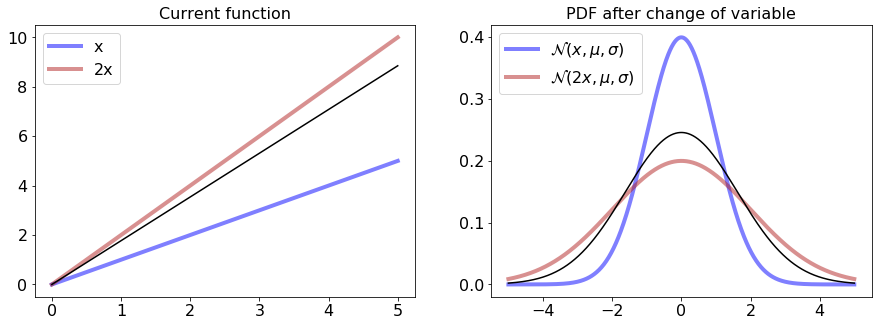

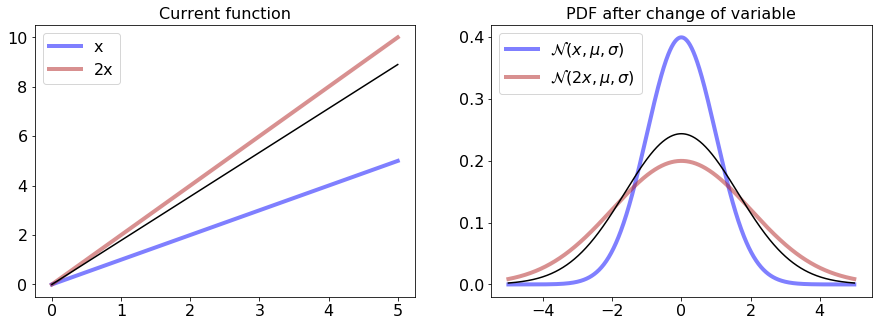

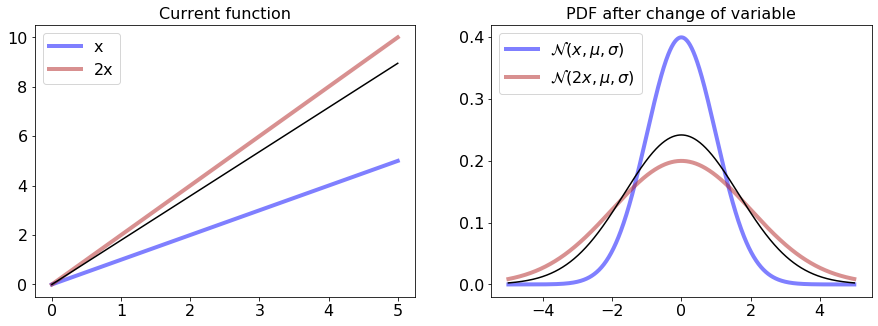

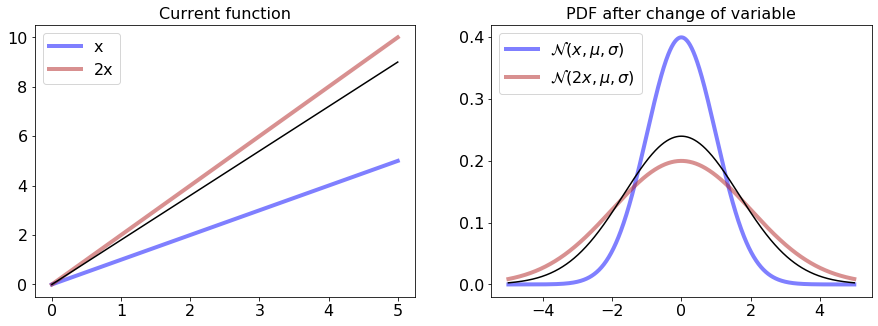

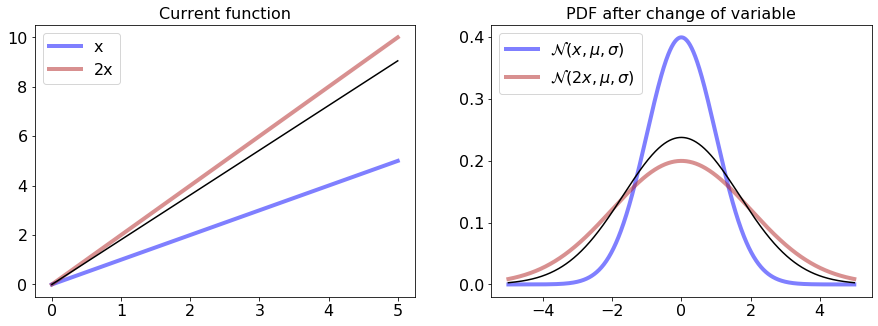

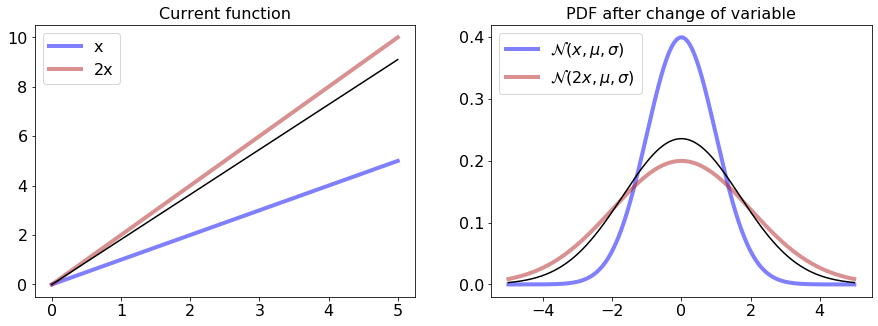

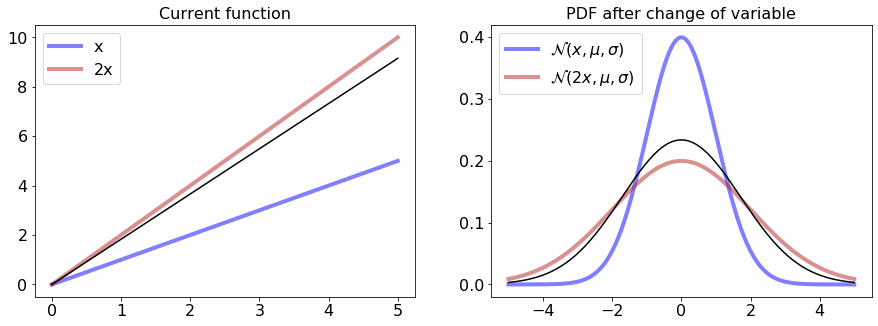

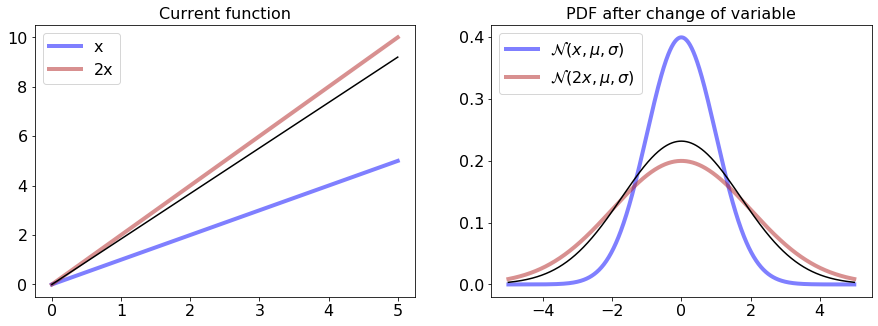

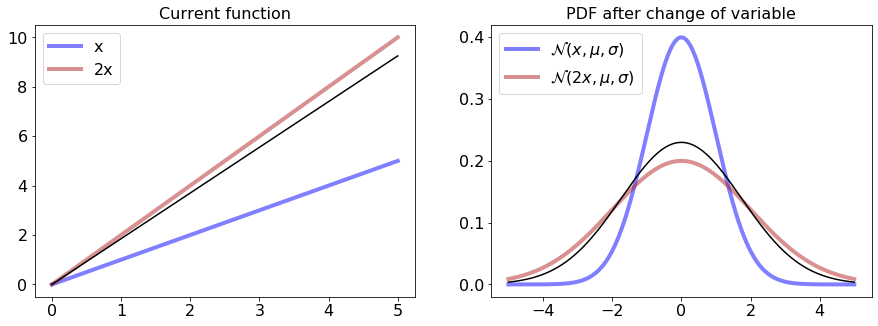

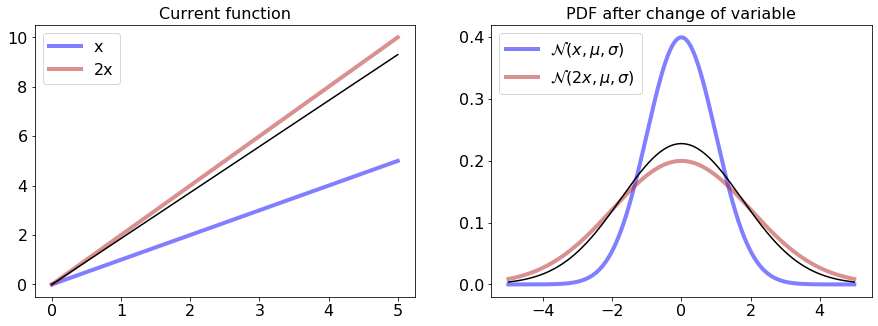

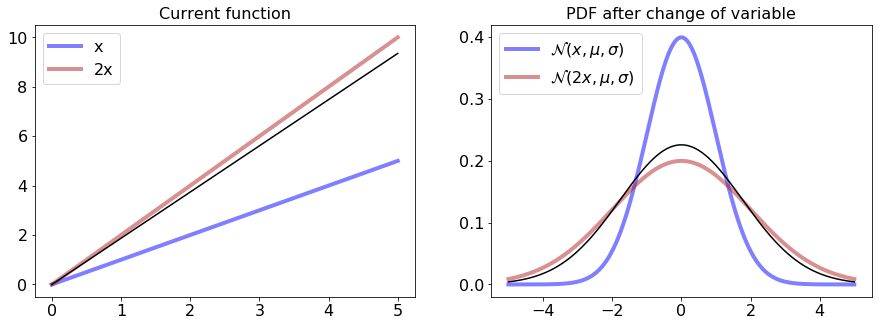

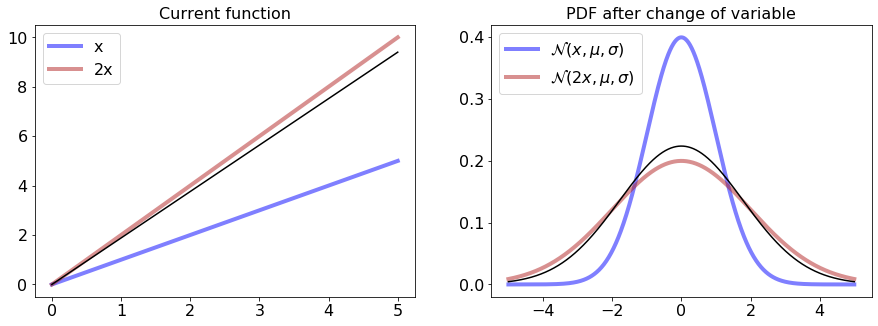

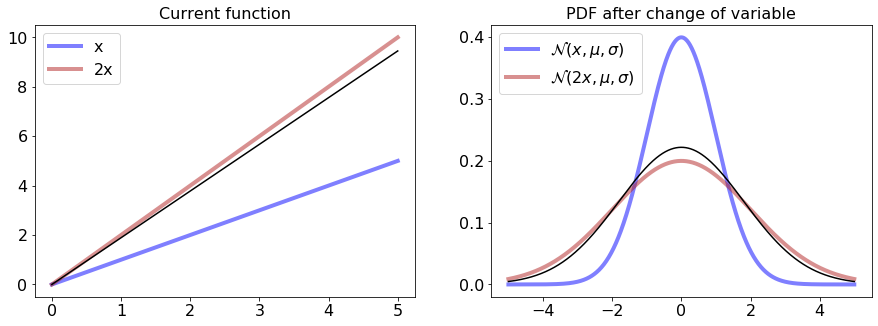

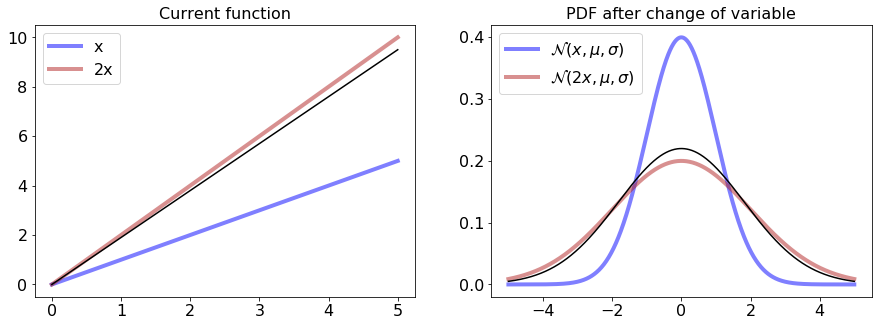

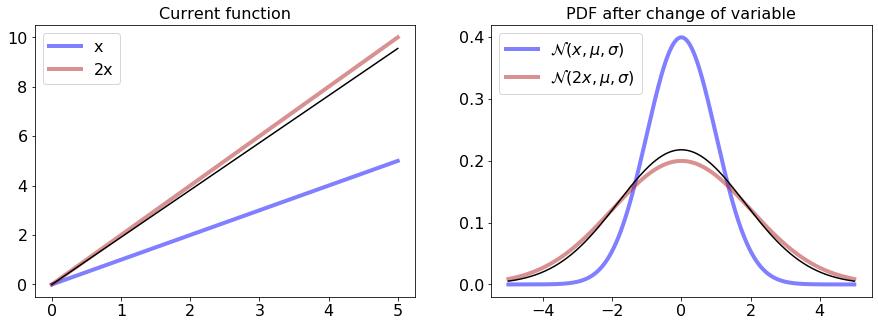

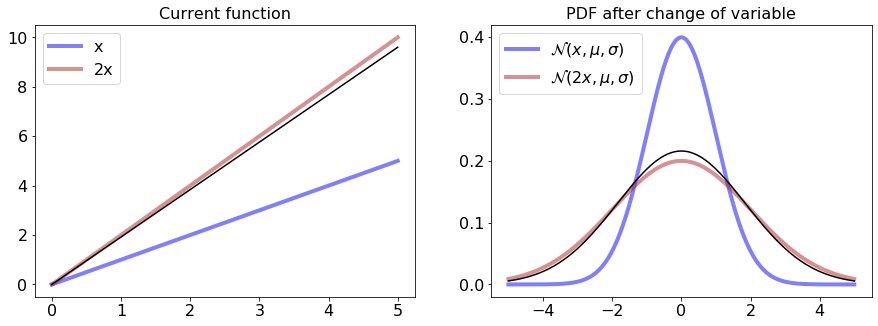

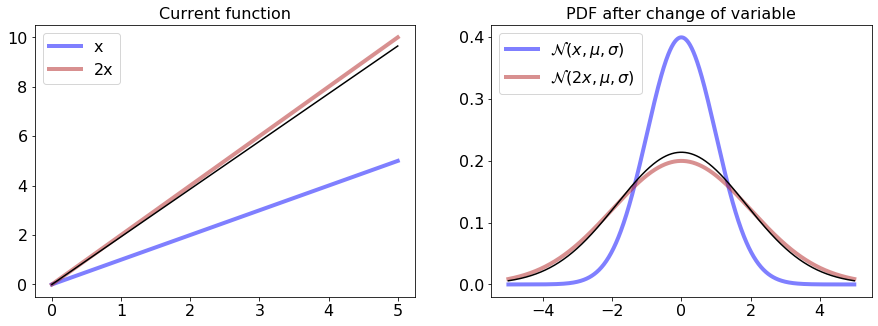

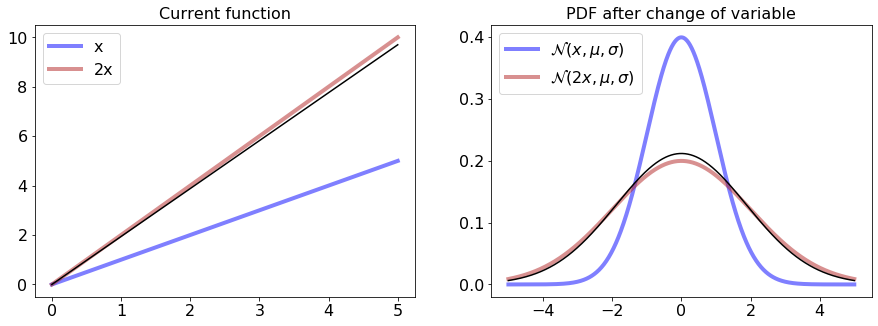

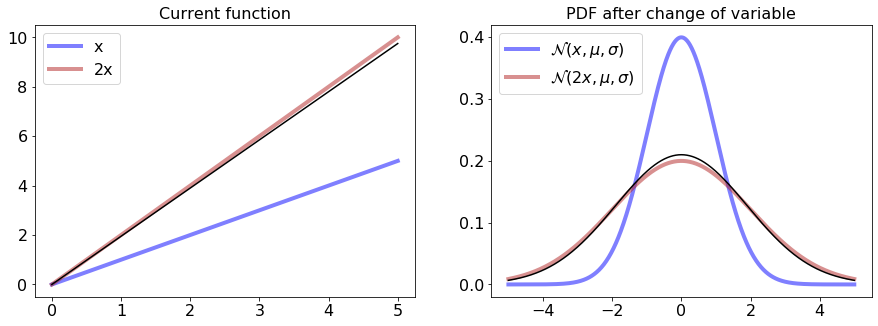

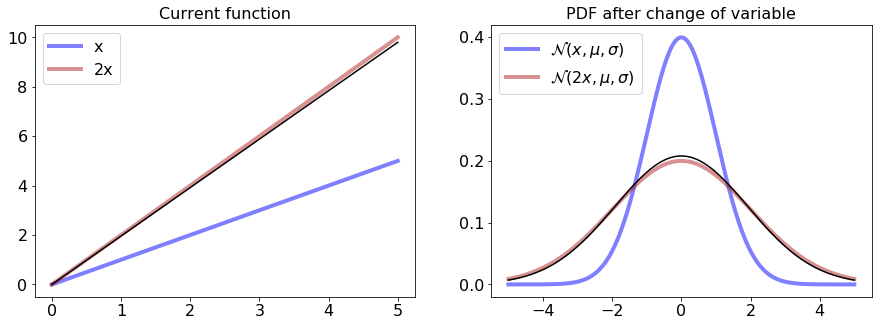

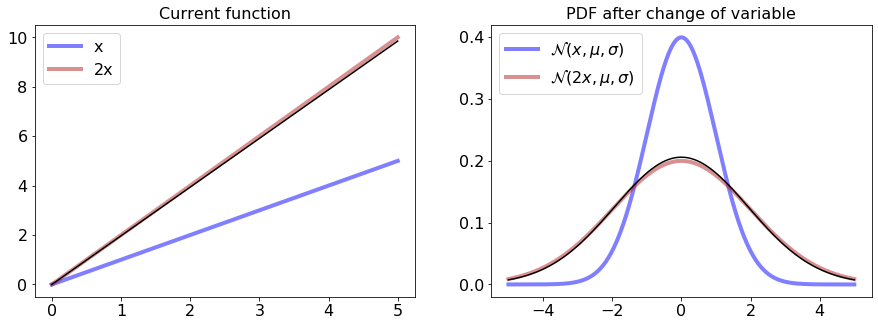

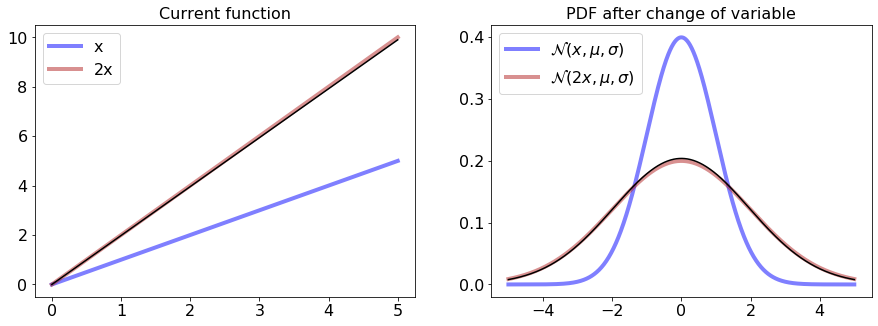

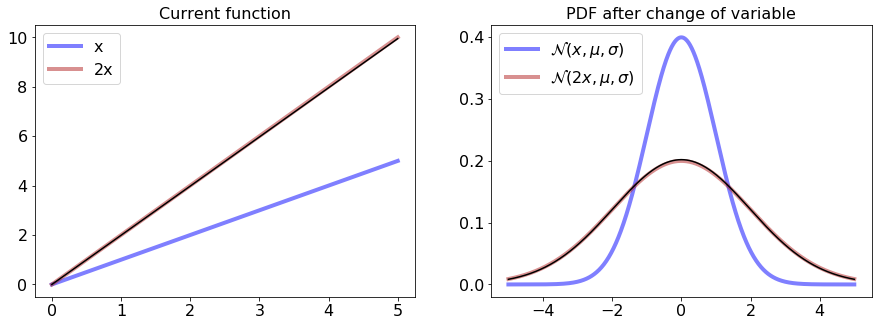

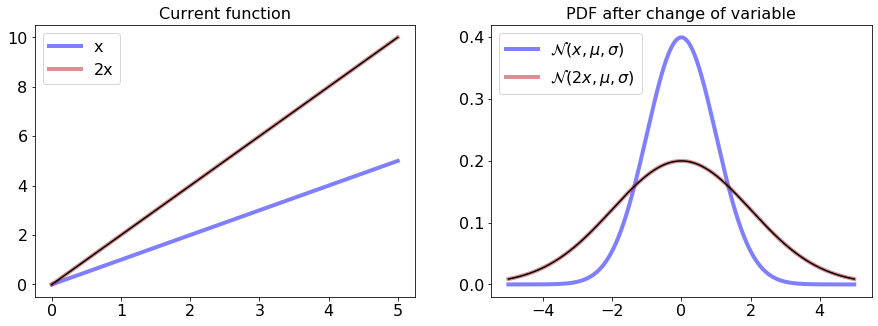

In [6]:
x_L = np.linspace(0, 5, 1000+1)
x_R = np.linspace(-5, 5, 1000+1)
ds = np.linspace(0.00001, 0.99999, 100+1)

normal_pdf = interpolate_Gaussian(x_R, m1, s1, a=0)
normal_pdf_2x = interpolate_Gaussian(x_R, m1, s1, a=1)

y_min = interpolate_2x(x_L, a=0)
y_max = interpolate_2x(x_L, a=1)


plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
legend_size=16
title_size=16

for d_ in ds:
    
    #compute
    y = interpolate_2x(x_L, a=d_)

    normal_pdf_2x_d = interpolate_Gaussian(x_R, m1, s1, a=d_)
    
    #plot
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].set_title('Current function', size=title_size)
    ax[0].plot(x_, y_min, lw=4, alpha=0.5, color='blue', label='x')
    ax[0].plot(x_, y_max, lw=4, alpha=0.5, color='firebrick', label='2x')
    ax[0].plot(x_, y, color='black')
    ax[0].legend(loc='upper left', prop={'size': legend_size})
    
    ax[1].set_title('PDF after change of variable', size=title_size)
    ax[1].plot(x_R, normal_pdf, lw=4, alpha=0.5, color='blue', label='$\mathcal{N}(x, \mu, \sigma)$')
    ax[1].plot(x_R, normal_pdf_2x, lw=4, alpha=0.5, color='firebrick', label='$\mathcal{N}(2x, \mu, \sigma)$')
    ax[1].plot(x_R, normal_pdf_2x_d, color='black')
    ax[1].legend(loc='upper left', prop={'size': legend_size})
    
    plt.show();

In [7]:
#plot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.close()

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
legend_size=16
title_size=16

def animate_func(i):
    
    d_ = ds[i]
    #compute
    y = interpolate_2x(x_L, a=d_)

    normal_pdf_2x_d = interpolate_Gaussian(x_R, m1, s1, a=d_)
    
    #plot
    ax[0].cla()
    ax[1].cla()
    
    ax[0].set_title('Current function', size=title_size)
    ax[0].plot(x_, y_min, lw=4, alpha=0.5, color='blue', label='x')
    ax[0].plot(x_, y_max, lw=4, alpha=0.5, color='firebrick', label='2x')
    ax[0].plot(x_, y, color='black')
    ax[0].legend(loc='upper left', prop={'size': legend_size})
    
    ax[1].set_title('PDF after change of variable', size=title_size)
    ax[1].plot(x_R, normal_pdf, lw=4, alpha=0.5, color='blue', label='$\mathcal{N}(x, \mu, \sigma)$')
    ax[1].plot(x_R, normal_pdf_2x, lw=4, alpha=0.5, color='firebrick', label='$\mathcal{N}(2x, \mu, \sigma)$')
    ax[1].plot(x_R, normal_pdf_2x_d, color='black')
    ax[1].legend(loc='upper left', prop={'size': legend_size})

In [8]:
from matplotlib import animation
from IPython.display import HTML

total_frames=100

# Animation setup
anim = animation.FuncAnimation(
    fig, func=animate_func, frames=total_frames, interval=100, blit=False
)
anim.save('Normal_2x.gif', dpi=300)
HTML(anim.to_jshtml())

MovieWriter stderr:
[gif @ 0x56167bc830c0] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '4500x1500', '-pix_fmt', 'rgba', '-r', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'Normal_2x.gif']' returned non-zero exit status 1.